In [1]:
import math
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from simple import nmf_son
from sklearn.decomposition import NMF


np.random.seed(42)
np.set_printoptions(precision=3)

In [2]:
def plot_scores(fscores, gscores, _lambda, log_scale=True):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    if log_scale:
        ax.set_yscale('log')
    ax.plot(fscores)
    ax.plot(gscores)
    ax.plot(fscores + _lambda * gscores)
    ax.legend(['f', 'g', 'total'])

def normalized_similarity(W_ins):
    r = W_ins.shape[1]
    res = np.ones(shape=(r, r)) * -1
    for i in range(r):
        for j in range(r):
            res[i, j] = np.linalg.norm(W_ins[:, i] - W_ins[:, j])
        res[i, :] = res[i, :] / sum(res[i, :])
    return res

In [3]:
mat = scipy.io.loadmat('urban/Urban.mat')
X = mat['X']

In [4]:
m, n = X.shape # (162, 94249)
num_col = int(math.sqrt(n)) # 307

In [5]:
X3d = X.reshape(m, num_col, num_col, order='F')

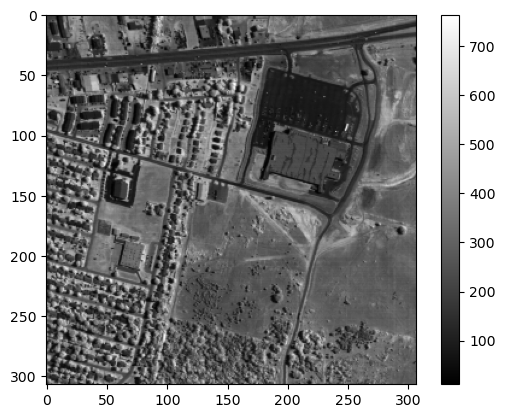

In [6]:
wavelength = 80
plt.imshow(X3d[wavelength, :, :], cmap='gray')
plt.colorbar()

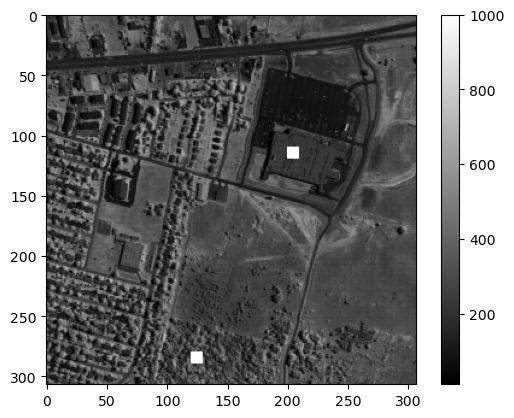

In [7]:
img = X3d[wavelength, :, :].copy()
img[280: 290, 120: 130] = 1000 # trees
img[110: 120, 200: 210] = 1000 # roof
plt.imshow(img, cmap='gray')
plt.colorbar()

In [8]:
trees3d = X3d[:, 280: 290, 120: 130] # (162, 10, 10)
asphalt3d = X3d[:, 110: 120, 200: 210] # (162, 10, 10)
smallX3d = np.hstack([trees3d, asphalt3d]) # (162, 20, 10)

In [9]:
smallX = smallX3d.reshape(m, -1, order='F') # (162, 200)

In [10]:
model = NMF(n_components=4, init='random', random_state=42, max_iter=2000)
vanillaW = model.fit_transform(smallX)
vanillaH = model.components_

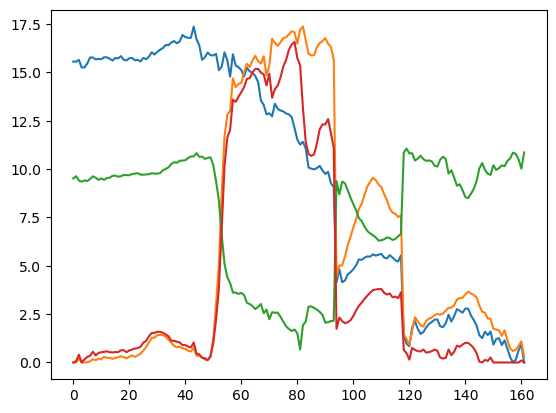

In [11]:
plt.plot(vanillaW)

In [34]:
rank = 4
iters = 2000
_lambda = 2

In [35]:
m, n = smallX.shape
# iniW = np.random.rand(m, rank)
# iniH = np.random.rand(rank, n)

In [40]:
for _lambda in [0.01, 0.1, 0.5, 1, 5, 10, 100]:
    Wb, Hb, Wl, Hl, fscores, gscores, lambda_vals = nmf_son(smallX, vanillaW.copy(), vanillaH.copy(), _lambda=_lambda, itermax=iters, scale_lambda=True)
    with open(f'urban/results/new/it{iters}-l{str(_lambda).replace(".", "_")}.npz', 'wb') as fout:
        np.savez_compressed(fout, Wb=Wb, Hb=Hb, Wl=Wl, Hl=Hl, fscores=fscores, gscores=gscores, lambda_vals=lambda_vals)

Iteration: 1, f=629.5720651344736, g=597.5649694650784,  total=63606.11234783671
Iteration: 2, f=629.4592476181191, g=597.306653637095,  total=63559.450573162816
Iteration: 3, f=629.4178042038033, g=597.0691508807122,  total=63550.3138298666
Iteration: 4, f=629.3993997112976, g=596.8405426655764,  total=63547.08042045234
Iteration: 5, f=629.3892978863579, g=596.6168155060575,  total=63545.7360762227
Iteration: 6, f=629.382375686084, g=596.3958139048959,  total=63544.99803053085
Iteration: 7, f=629.3766965542512, g=596.1763238542494,  total=63544.45126396536
Iteration: 8, f=629.3715356035716, g=595.957641699963,  total=63543.9551598743
Iteration: 9, f=629.3666261981987, g=595.7393572538641,  total=63543.46787420515
Iteration: 10, f=629.3618818537991, g=595.5212135254243,  total=63542.97878869151
Iteration: 11, f=629.3572899654539, g=595.3030639175738,  total=63542.49087298961
Iteration: 12, f=629.3528293383124, g=595.0848508645824,  total=63542.0122359572
Iteration: 13, f=629.3485111036

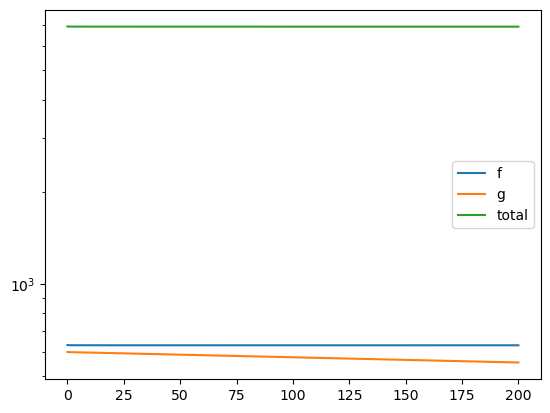

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yscale('log')
ax.plot(fscores)
ax.plot(gscores)
ax.plot(fscores + lambda_vals * gscores)
ax.legend(['f', 'g', 'total'])

In [41]:
normalized_similarity(Wl)

array([[0.   , 0.361, 0.288, 0.351],
       [0.426, 0.   , 0.452, 0.123],
       [0.274, 0.365, 0.   , 0.361],
       [0.42 , 0.125, 0.455, 0.   ]])

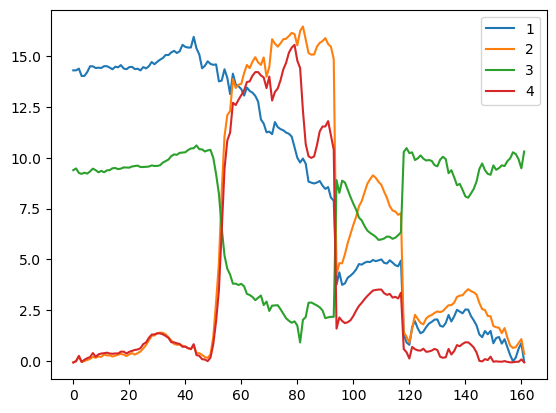

In [42]:
plt.plot(Wl)
plt.legend(['1', '2', '3', '4'])

In [17]:
# m, n = smallX.shape
# W_ini = np.random.rand(m, rank)
# H_ini = np.random.rand(rank, n)
#
# for lval in [0.25, 0.5, 1, 2, 4, 8]:
#     Wb, Hb, Wl, Hl, fscores, gscores, lambda_vals = nmf(smallX, W_ini.copy(), H_ini.copy(), _lambda=lval, itermax=iterations, scale_lambda=True, verbose=True)
#     with open(f'urban/results/new/it{iterations}_l{str(lval).replace(".", "-")}.npz', 'wb') as fout:
#         np.savez_compressed(fout, Wb=Wb, Hb=Hb, Wl=Wl, Hl=Hl, fscores=fscores, gscores=gscores, lambda_vals=lambda_vals)

In [18]:
# for lval in [0.25, 0.5, 1, 2, 4, 8]:
#     Wb, Hb, Wl, Hl, fscores, gscores, lambda_vals = nmf(smallX, W_ini.copy(), H_ini.copy(), _lambda=lval, itermax=iterations, scale_lambda=True, verbose=True, zero_thres=True)
#     with open(f'urban/results/new/mod_it{iterations}_l{str(lval).replace(".", "-")}.npz', 'wb') as fout:
#         np.savez_compressed(fout, Wb=Wb, Hb=Hb, Wl=Wl, Hl=Hl, fscores=fscores, gscores=gscores, lambda_vals=lambda_vals)

In [19]:
# model = NMF(n_components=rank, init='random', random_state=42, max_iter=iterations)
# vanillaW = model.fit_transform(smallX)
# vanillaH = model.components_

In [20]:
# for lval in [0.25, 0.5, 1, 2, 4, 8]:
#     Wb, Hb, Wl, Hl, fscores, gscores, lambda_vals = nmf(smallX, vanillaW.copy(), vanillaH.copy(), _lambda=lval, itermax=iterations, scale_lambda=True, verbose=True)
#     with open(f'urban/results/new/nmf_ini_it{iterations}_l{str(lval).replace(".", "-")}.npz', 'wb') as fout:
#         np.savez_compressed(fout, Wb=Wb, Hb=Hb, Wl=Wl, Hl=Hl, fscores=fscores, gscores=gscores, lambda_vals=lambda_vals)

In [21]:
# for lval in [0.25, 0.5, 1, 2, 4, 8]:
#     Wb, Hb, Wl, Hl, fscores, gscores, lambda_vals = nmf(smallX, vanillaW.copy(), vanillaH.copy(), _lambda=lval, itermax=iterations, scale_lambda=True, verbose=True, zero_thres=True)
#     with open(f'urban/results/new/nmf_ini_mod_it{iterations}_l{str(lval).replace(".", "-")}.npz', 'wb') as fout:
#         np.savez_compressed(fout, Wb=Wb, Hb=Hb, Wl=Wl, Hl=Hl, fscores=fscores, gscores=gscores, lambda_vals=lambda_vals)

In [22]:
# lval = 2
# iterations = 50000
#
# Wb, Hb, Wl, Hl, fscores, gscores, lambda_vals = nmf(smallX, W_ini.copy(), H_ini.copy(), _lambda=lval, itermax=iterations, scale_lambda=True, verbose=True)
# with open(f'urban/results/new/it{iterations}_l{str(lval).replace(".", "-")}.npz', 'wb') as fout:
#     np.savez_compressed(fout, Wb=Wb, Hb=Hb, Wl=Wl, Hl=Hl, fscores=fscores, gscores=gscores, lambda_vals=lambda_vals)

In [23]:
# Wb, Hb, Wl, Hl, fscores, gscores, lambda_vals = nmf(smallX, vanillaW.copy(), vanillaH.copy(), _lambda=lval, itermax=iterations, scale_lambda=True, verbose=True)
# with open(f'urban/results/new/it{iterations}_l{str(lval).replace(".", "-")}.npz', 'wb') as fout:
#     np.savez_compressed(fout, Wb=Wb, Hb=Hb, Wl=Wl, Hl=Hl, fscores=fscores, gscores=gscores, lambda_vals=lambda_vals)

In [24]:
# data = np.load('urban/results/new/mod_it5000_l1.npz')
# Wl = data['Wl']
# Hl = data['Hl']
# Wb = data['Wb']
# Hb = data['Hb']
# fscores = data['fscores']
# gscores = data['gscores']
# lambda_vals = data['lambda_vals']